In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


net_data = pd.read_csv(
    '/content/drive/MyDrive/u.data',
    sep='\t',
    names=['user_id', 'movie_id', 'rating', 'timestamp'],
    engine='python'
)

net_data.head()


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
net_data=net_data.drop(['timestamp'],axis=1)
net_data.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [ ]:
net_data=net_data[net_data['movie_id']==1][['user_id','rating']]
net_data.head()


,user_id,rating
24,308,4
454,287,5
957,148,4
971,280,4
1324,66,3


In [ ]:
print(net_data.columns)


Index(['user_id', 'rating'], dtype='object')


In [ ]:




# Read dataset
net_data = pd.read_csv(
    '/content/drive/MyDrive/u.data',
    sep='\t',
    header=None,
    names=['user_id', 'movie_id', 'rating', 'timestamp'],
    engine='python'
)

# Sort so users are ordered nicely
net_data = net_data.sort_values(by=['user_id', 'movie_id'])

final_list = []

for m_id in sorted(net_data['movie_id'].unique()):
    # Add the movie_id row with NaN rating
    final_list.append({'user_id': f"{m_id}:", 'rating': float('nan')})

    # Add all (user_id, rating) for this movie
    movie_ratings = net_data.loc[net_data['movie_id'] == m_id, ['user_id', 'rating']]
    final_list.extend(movie_ratings.to_dict(orient='records'))

# Create DataFrame
final_df = pd.DataFrame(final_list)

print(final_df.head(15))




   user_id  rating
0       1:     NaN
1        1     5.0
2        2     4.0
3        5     4.0
4        6     4.0
5       10     4.0
6       13     3.0
7       15     1.0
8       16     5.0
9       17     4.0
10      18     5.0
11      20     3.0
12      21     5.0
13      23     5.0
14      25     5.0


In [ ]:
net_data.dtypes

,0
user_id,int64
movie_id,int64
rating,int64
timestamp,int64


In [ ]:
net_data['user_id']=net_data['user_id'].astype('object')
net_data['rating']=net_data['rating'].astype('float')
net_data.dtypes

,0
user_id,object
movie_id,int64
rating,float64
timestamp,int64


In [ ]:
net_data.shape

(100000, 4)

In [ ]:
net_data["rating"].value_counts()

,count
rating,
4.0,34174
3.0,27145
5.0,21201
2.0,11370
1.0,6110


In [ ]:
p=net_data.groupby('rating')['rating'].count().sort_values(ascending=False)
p.head()

,rating
rating,
4.0,34174
3.0,27145
5.0,21201
2.0,11370
1.0,6110


In [ ]:
stars =net_data.groupby('rating')['rating'].agg(['count'])
stars.head()

,count
rating,
1.0,6110
2.0,11370
3.0,27145
4.0,34174
5.0,21201


In [ ]:
movie_count=net_data.isna().sum()
movie_count

,0
user_id,0
movie_id,0
rating,0
timestamp,0


In [ ]:
final_df.head(15)


,user_id,rating
0,1:,NaN
1,1,5.0
2,2,4.0
3,5,4.0
4,6,4.0
5,10,4.0
6,13,3.0
7,15,1.0
8,16,5.0
9,17,4.0


In [ ]:
movie_count=final_df['rating'].isna().sum()
print("Number of Nan values in rating colomn:",movie_count)


Number of Nan values in rating colomn: 1682


In [ ]:
final_df.dtypes

,0
user_id,object
rating,float64


In [ ]:
customer_count=final_df['user_id'].nunique()
print("Number of unique customers:",customer_count)

Number of unique customers: 2625




---



In [ ]:
customer_count=customer_count-movie_count
customer_count

943

In [ ]:
final_df['user_id'].count()

101682

In [ ]:
rating_count=final_df['rating'].count() - movie_count
rating_count

98318

In [ ]:
final_df["rating"]. value_counts()

,count
rating,
4.0,34174
3.0,27145
5.0,21201
2.0,11370
1.0,6110


In [ ]:
p= final_df.groupby('rating')['rating'].count().sort_values(ascending=False)
p.head()

,rating
rating,
4.0,34174
3.0,27145
5.0,21201
2.0,11370
1.0,6110


In [ ]:
stars = final_df.groupby('rating')['rating'].agg(['count'])
stars.head()

,count
rating,
1.0,6110
2.0,11370
3.0,27145
4.0,34174
5.0,21201


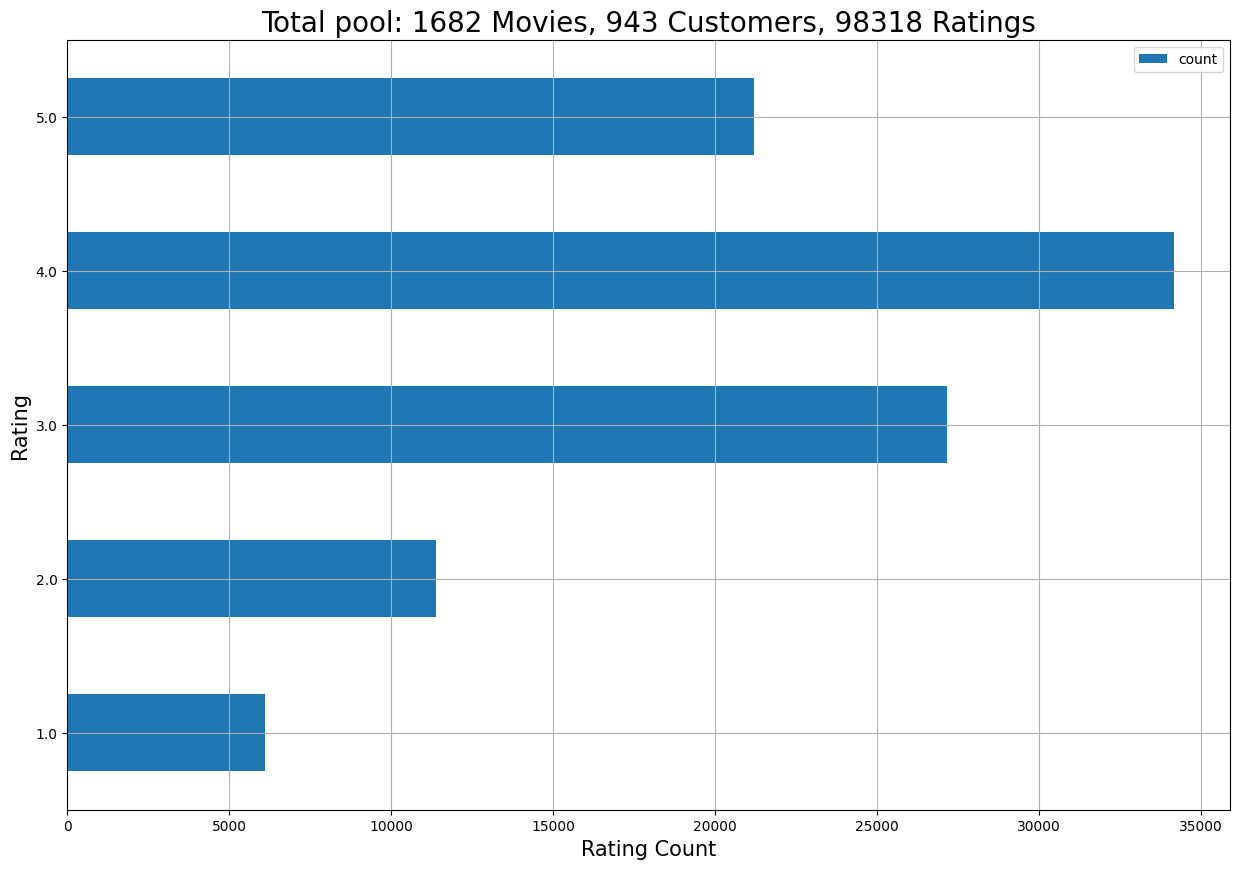

In [ ]:
ax = stars.plot(kind='barh', figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} Ratings',fontsize=20)
plt.xlabel('Rating Count',fontsize=15)
plt.ylabel('Rating',fontsize=15)
plt.grid(True)


In [ ]:
df_nan=pd.DataFrame(pd.isna(final_df.rating))
df_nan

,rating
0,True
1,False
2,False
3,False
4,False
...,...
101677,False
101678,True
101679,False
101680,True


In [ ]:
df_nan=df_nan[df_nan['rating']==True]
df_nan

,rating
0,True
453,True
585,True
676,True
886,True
...,...
101672,True
101674,True
101676,True
101678,True


In [ ]:
df_nan.shape

(1682, 1)

In [ ]:
df_nan.head()

,rating
0,True
453,True
585,True
676,True
886,True


In [ ]:
df_nan.tail()

,rating
101672,True
101674,True
101676,True
101678,True
101680,True


In [ ]:
if 'level_0' in df_nan.columns:
    df_nan = df_nan.drop(columns=['level_0'])
df_nan=df_nan.reset_index()
df_nan


,index,rating
0,0,True
1,453,True
2,585,True
3,676,True
4,886,True
...,...,...
1677,101672,True
1678,101674,True
1679,101676,True
1680,101678,True


In [ ]:
df_nan

,index,rating
0,0,True
1,453,True
2,585,True
3,676,True
4,886,True
...,...,...
1677,101672,True
1678,101674,True
1679,101676,True
1680,101678,True


In [ ]:

df_nan.columns.to_list()

['index', 'rating']

In [ ]:
f_nan=df_nan.reset_index()

In [ ]:
df_nan['index'][1:]

,index
1,453
2,585
3,676
4,886
5,973
...,...
1677,101672
1678,101674
1679,101676
1680,101678


In [ ]:
df_nan['index'][:-1]

,index
0,0
1,453
2,585
3,676
4,886
...,...
1676,101670
1677,101672
1678,101674
1679,101676


In [ ]:
np.full((2,4),'2.0')  #work of full function

array([['2.0', '2.0', '2.0', '2.0'],
       ['2.0', '2.0', '2.0', '2.0']], dtype='<U3')

In [ ]:
x=zip(df_nan['index'][1:],df_nan['index'][:-1])
x

In [ ]:
tuple(x)

((453, 0),
 (585, 453),
 (676, 585),
 (886, 676),
 (973, 886),
 (1000, 973),
 (1393, 1000),
 (1613, 1393),
 (1913, 1613),
 (2003, 1913),
 (2240, 2003),
 (2508, 2240),
 (2693, 2508),
 (2877, 2693),
 (3171, 2877),
 (3211, 3171),
 (3304, 3211),
 (3315, 3304),
 (3385, 3315),
 (3458, 3385),
 (3543, 3458),
 (3841, 3543),
 (4024, 3841),
 (4199, 4024),
 (4493, 4199),
 (4567, 4493),
 (4625, 4567),
 (4902, 4625),
 (5017, 4902),
 (5055, 5017),
 (5210, 5055),
 (5292, 5210),
 (5390, 5292),
 (5398, 5390),
 (5410, 5398),
 (5424, 5410),
 (5433, 5424),
 (5554, 5433),
 (5642, 5554),
 (5700, 5642),
 (5738, 5700),
 (5887, 5738),
 (5928, 5887),
 (6008, 5928),
 (6089, 6008),
 (6117, 6089),
 (6251, 6117),
 (6369, 6251),
 (6451, 6369),
 (7035, 6451),
 (7117, 7035),
 (7209, 7117),
 (7338, 7209),
 (7443, 7338),
 (7593, 7443),
 (7988, 7593),
 (8029, 7988),
 (8205, 8029),
 (8289, 8205),
 (8354, 8289),
 (8414, 8354),
 (8542, 8414),
 (8625, 8542),
 (8909, 8625),
 (9025, 8909),
 (9188, 9025),
 (9292, 9188),
 (9427, 

In [ ]:
temp = np.full((1,452) , 1)
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [ ]:
# now  we will cretae numpy array that will contain 1 from 0 to 452 , 2 from 454 to 584 and so on.
movie_np=[] # np list created
movie_id = 1
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
  temp = np.full((1,i-j-1) , movie_id)
  movie_np = np.append(movie_np,temp)
  movie_id +=1

  # account for last record and corresponding length
  # numpy approach
  last_record = np.full((1,len(final_df)-df_nan.iloc[-1,0]-1),movie_id)
  movie_np = np.append(movie_np,last_record)


In [ ]:
final_df = final_df[pd.notnull(final_df['rating'])]
final_df['user_id']= final_df['user_id'].astype(int)
print("now the data set will look like")
final_df


now the data set will look like


,user_id,rating
1,1,5.0
2,2,4.0
3,5,4.0
4,6,4.0
5,10,4.0
...,...,...
101673,863,1.0
101675,863,3.0
101677,863,2.0
101679,896,3.0


In [ ]:
dataset_movie_summary = net_data.groupby('movie_id')['rating'].agg(['count'])
dataset_movie_summary

,count
movie_id,
1,452
2,131
3,90
4,209
5,86
...,...
1678,1
1679,1
1680,1


In [ ]:
dataset_movie_summary["count"].quantile(0.7)

65.0

In [ ]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

65.0

In [ ]:
dataset_movie_summary['count']

,count
movie_id,
1,452
2,131
3,90
4,209
5,86
...,...
1678,1
1679,1
1680,1


In [ ]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   6,   16,   18,   27,   30,   34,   35,   36,   37,   40,
       ...
       1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682],
      dtype='int64', name='movie_id', length=1175)

In [ ]:
len(drop_movie_list)

1175

In [ ]:
#now we will remove all the users are in active.
dataset_user_summary = net_data.groupby('user_id')['rating'].agg(['count'])
dataset_user_summary

,count
user_id,
1,272
2,62
3,54
4,24
5,175
...,...
939,49
940,107
941,22


In [ ]:
customer_benchmark = round(dataset_user_summary['count'].quantile(0.7),0)
customer_benchmark

127.0

In [ ]:
drop_customer_list = dataset_user_summary[dataset_user_summary['count'] < customer_benchmark].index
drop_customer_list

Index([  2,   3,   4,   8,   9,  12,  14,  15,  17,  19,
       ...
       929, 930, 931, 935, 937, 938, 939, 940, 941, 942],
      dtype='int64', name='user_id', length=656)

In [ ]:
#Now we will remove all the customers and movies that are below the bench mark.
print("The originiol dataframe has :", net_data.shape ," Shape.")

The originiol dataframe has : (100000, 4)  Shape.


In [ ]:
net_data

,user_id,movie_id,rating,timestamp
32236,1,1,5.0,874965758
23171,1,2,3.0,876893171
83307,1,3,4.0,878542960
62631,1,4,3.0,876893119
47638,1,5,3.0,889751712
...,...,...,...,...
68857,943,1067,2.0,875501756
74200,943,1074,4.0,888640250
78704,943,1188,3.0,888640250
86600,943,1228,3.0,888640275


In [ ]:
net_data = net_data[~net_data['movie_id'].isin(drop_movie_list)]
net_data = net_data[~net_data['user_id'].isin(drop_customer_list)]
print("The new dataframe has :", net_data.shape ," Shape.")

The new dataframe has : (49725, 4)  Shape.


In [ ]:
net_data['movie_id'].isin(drop_movie_list)

,movie_id
32236,False
23171,False
83307,False
62631,False
47638,False
...,...
80701,False
72652,False
82954,False
99133,False


In [ ]:
net_data.head()

,user_id,movie_id,rating,timestamp
32236,1,1,5.0,874965758
23171,1,2,3.0,876893171
83307,1,3,4.0,878542960
62631,1,4,3.0,876893119
47638,1,5,3.0,889751712


In [ ]:
net_data.drop('timestamp',axis=1,inplace=True)
net_data.head()

,user_id,movie_id,rating
32236,1,1,5.0
23171,1,2,3.0
83307,1,3,4.0
62631,1,4,3.0
47638,1,5,3.0


In [ ]:
import pandas as pd
#import re
#movies = pd.read_csv('movies.csv')

#Extract year using a regex capturing 4 digits in parathesis at end.
#movies['year'] = movies['title'].str.extract(r'\((\d{4})\)' , expand = False)

#select only the column you need
#movies = movies[['movie_id','title','year']]
#movies.head()



movie_title = pd.read_csv(
    '/content/drive/MyDrive/movie.csv',
    header=None,             # no header row
    names=['Movie_id', 'title'],  # assign column names
    usecols=[0, 1],          # only first 2 columns
    encoding='latin-1',
    quotechar='"',           # handle quotes in titles
    on_bad_lines='skip'      # skip malformed lines
)
movie_title = movie_title.drop(index=0).reset_index(drop=True)

movie_title.set_index('Movie_id',inplace=True)
movie_title.head()


,title
Movie_id,
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)


In [ ]:





movie_title.shape

In [ ]:
!pip install scikit-surprise


In [ ]:
!pip install "numpy<2" --upgrade



In [ ]:
#build model
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate


In [ ]:
reader = Reader()

#svd = SVD()
#cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
#

In [ ]:
data = Dataset.load_from_df(net_data[['user_id', 'movie_id', 'rating']], reader)


In [ ]:
data

In [ ]:
model = SVD()

In [ ]:
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9031  0.8995  0.9021  0.8938  0.9030  0.9003  0.0035  
MAE (testset)     0.7122  0.7009  0.7082  0.7030  0.7067  0.7062  0.0040  
Fit time          0.83    0.55    0.53    0.53    0.56    0.60    0.11    
Test time         0.05    0.05    0.07    0.05    0.18    0.08    0.05    


{'test_rmse': array([0.90313215, 0.89953881, 0.90209545, 0.89378315, 0.90303307]),
 'test_mae': array([0.71220751, 0.70094829, 0.70815803, 0.7029874 , 0.70670306]),
 'fit_time': (0.8276171684265137,
  0.5529279708862305,
  0.5277197360992432,
  0.5324194431304932,
  0.5561408996582031),
 'test_time': (0.04735112190246582,
  0.04741191864013672,
  0.06672143936157227,
  0.046788692474365234,
  0.1799638271331787)}

In [ ]:
# so first we take user 2345 and try to recomond movies based on past data
dataset_18 = net_data[(net_data['user_id']== 18) & (net_data['rating']==5)]
dataset_18

,user_id,movie_id,rating
14367,18,1,5.0
76676,18,8,5.0
26659,18,9,5.0
7355,18,12,5.0
15859,18,13,5.0
...,...,...,...
76888,18,633,5.0
11011,18,660,5.0
5737,18,699,5.0
33569,18,709,5.0


In [ ]:
movie_title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27278 entries, 1 to 131262
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   27278 non-null  object
dtypes: object(1)
memory usage: 426.2+ KB


In [ ]:
net_data[net_data['user_id']== 18]

,user_id,movie_id,rating
14367,18,1,5.0
22868,18,4,3.0
76676,18,8,5.0
26659,18,9,5.0
7355,18,12,5.0
...,...,...,...
28130,18,781,3.0
8875,18,792,5.0
20517,18,845,3.0
26034,18,949,3.0


In [ ]:
movie_title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27278 entries, 1 to 131262
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   27278 non-null  object
dtypes: object(1)
memory usage: 426.2+ KB


In [ ]:
dataset_18 = movie_title.copy()

dataset_18

,title
Movie_id,
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)
...,...
131254,Kein Bund fÃ¼r's Leben (2007)
131256,"Feuer, Eis & Dosenbier (2002)"
131258,The Pirates (2014)


In [ ]:
dataset_18 = dataset_18.reset_index()

dataset_18

,Movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
27273,131254,Kein Bund fÃ¼r's Leben (2007)
27274,131256,"Feuer, Eis & Dosenbier (2002)"
27275,131258,The Pirates (2014)
27276,131260,Rentun Ruusu (2001)


In [ ]:
dataset_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_id  27278 non-null  object
 1   title     27278 non-null  object
dtypes: object(2)
memory usage: 426.3+ KB


In [ ]:
dataset_18 = dataset_18.rename(columns={'Movie_id':'movie_id'} )

In [ ]:
dataset_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  27278 non-null  object
 1   title     27278 non-null  object
dtypes: object(2)
memory usage: 426.3+ KB


In [ ]:
dataset_18['movie_id'] = dataset_18['movie_id'].astype(int)

dataset_18=dataset_18[~dataset_18['movie_id'].isin(drop_movie_list)]

dataset_18

,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
27273,131254,Kein Bund fÃ¼r's Leben (2007)
27274,131256,"Feuer, Eis & Dosenbier (2002)"
27275,131258,The Pirates (2014)
27276,131260,Rentun Ruusu (2001)


In [ ]:
dataset_18['Estimate_score'] = dataset_18['movie_id'].apply(lambda x: model.predict(18, x).est)



dataset_18.head()



,movie_id,title,Estimate_score
0,1,Toy Story (1995),4.046652
1,2,Jumanji (1995),3.021984
2,3,Grumpier Old Men (1995),3.006224
3,4,Waiting to Exhale (1995),3.444330
4,5,Father of the Bride Part II (1995),3.425651


In [ ]:
dataset_18 =dataset_18.sort_values('Estimate_score', ascending=False)
dataset_18


,movie_id,title,Estimate_score
125,127,"Silences of the Palace, The (Saimt el Qusur) (...",4.790540
282,285,Beyond Bedlam (1993),4.747458
423,427,Boxing Helena (1993),4.731577
404,408,8 Seconds (1994),4.687690
476,480,Jurassic Park (1993),4.681269
...,...,...,...
240,243,Gordy (1995),2.429564
118,120,Race the Sun (1996),2.363546
334,338,Virtuosity (1995),2.354266
408,412,"Age of Innocence, The (1993)",2.277690


In [ ]:


user_movie_recommendations = {}


for user_id in net_data['user_id'].unique():

    all_movie_ids = dataset_18['movie_id'].tolist()


    rated_movie_ids = net_data[net_data['user_id'] == user_id]['movie_id'].tolist()


    movies_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]


    predictions = [(movie_id, model.predict(user_id, movie_id).est) for movie_id in movies_to_predict]


    predictions.sort(key=lambda x: x[1], reverse=True)


    top_n_recommendations = predictions[:10]


    user_movie_recommendations[user_id] = top_n_recommendations


for user_id, recommendations in list(user_movie_recommendations.items())[:5]:
    print(f"Recommendations for User {user_id}:")
    for movie_id, estimated_score in recommendations:

        movie_title_row = movie_title.loc[movie_title.index == str(movie_id)]
        if not movie_title_row.empty:
            title = movie_title_row.iloc[0]['title']
            print(f"- Movie ID: {movie_id}, Title: {title}, Estimated Score: {estimated_score:.2f}")
        else:
            print(f"- Movie ID: {movie_id}, Estimated Score: {estimated_score:.2f} (Title not found)")
    print("\n")

Recommendations for User 1:
- Movie ID: 480, Title: Jurassic Park (1993), Estimated Score: 4.76
- Movie ID: 285, Title: Beyond Bedlam (1993), Estimated Score: 4.73
- Movie ID: 408, Title: 8 Seconds (1994), Estimated Score: 4.64
- Movie ID: 302, Title: Queen Margot (Reine Margot, La) (1994), Estimated Score: 4.62
- Movie ID: 429, Title: Cabin Boy (1994), Estimated Score: 4.56
- Movie ID: 511, Title: Program, The (1993), Estimated Score: 4.55
- Movie ID: 357, Title: Four Weddings and a Funeral (1994), Estimated Score: 4.55
- Movie ID: 603, Title: Bye Bye, Love (1995), Estimated Score: 4.54
- Movie ID: 316, Title: Stargate (1994), Estimated Score: 4.51
- Movie ID: 435, Title: Coneheads (1993), Estimated Score: 4.49


Recommendations for User 5:
- Movie ID: 318, Title: Shawshank Redemption, The (1994), Estimated Score: 4.31
- Movie ID: 484, Title: Lassie (1994), Estimated Score: 4.09
- Movie ID: 603, Title: Bye Bye, Love (1995), Estimated Score: 4.09
- Movie ID: 114, Title: Margaret's Muse